## UAS DL
==========================
<br>

NAMA     : MIP SARIPUDIN <br>
NIM       : I.2111734
<br>
============================

In [10]:
import torch
import torchvision.transforms as transforms
from torchvision.datasets import CIFAR100
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

In [11]:
(x_train, x_label), (y_test,y_label) = cifar100.load_data(label_mode='fine')

In [19]:
indeks_trees = {
    "maple":47,
    "oak":52,
    "palm":56,
    "pine":59,
    "willow":96
}

In [30]:
print( x_train.shape)
print( y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


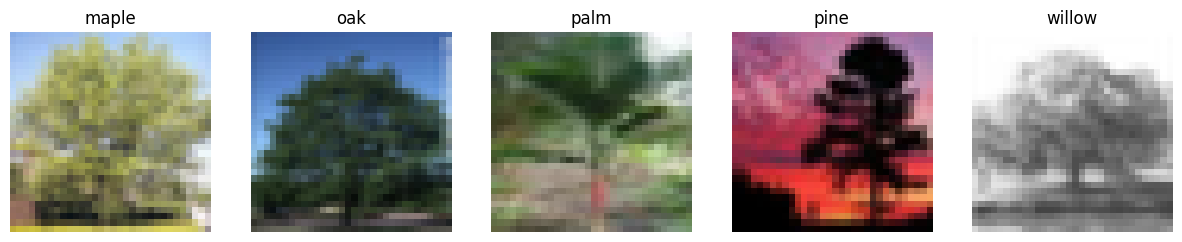

In [20]:
plt.figure(figsize=(15,3))
for i, (nama_kelas, nama_indeks) in enumerate (indeks_trees.items()):
    indeks = np.where(x_label.flatten() == nama_indeks)[0][0]
    plt.subplot(1, len(indeks_trees), i+1)
    plt.imshow(x_train[indeks])
    plt.title(nama_kelas)
    plt.axis("off")
plt.show()

Class: trees, Num Images: 500, Image Size: (32, 32, 3)


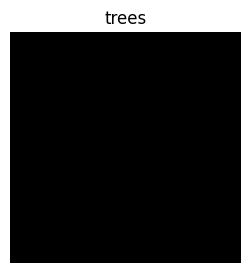

In [31]:
superclass_name = 'trees'
indeks_superclass = {"trees": 59}

plt.figure(figsize=(15, 3))
for i, (nama_kelas, nama_indeks) in enumerate(indeks_superclass.items()):
    indeks = np.where(x_label.flatten() == nama_indeks)[0][0]
    plt.subplot(1, len(indeks_superclass), i + 1)
    plt.imshow(x_train[indeks])
    plt.title(nama_kelas)
    plt.axis("off")

    num_images = len(np.where(x_label.flatten() == nama_indeks)[0])
    image_size = x_train[indeks].shape
    print(f"Class: {nama_kelas}, Num Images: {num_images}, Image Size: {image_size}")

plt.show()

In [23]:
indeks2_trees = [47, 52, 56,59, 96]

x_train_baru = []
x_label_baru = []

for i in indeks2_trees:
    indeks = np.where(x_label == i)[0]
    x_train_baru.append(x_train[indeks])
    x_label_baru.append(x_label[indeks])

x_train_baru = np.concatenate(x_train_baru)
x_label_baru = np.concatenate(x_label_baru)

In [26]:
indeks2_trees = [47, 52, 56,59, 96]

y_test_baru = []
y_label_baru = []

for i in indeks2_trees:
    indeks = np.where(x_label == i)[0]
    y_test_baru.append(x_train[indeks])
    y_label_baru.append(x_label[indeks])

y_test_baru = np.concatenate(x_train_baru)
y_label_baru = np.concatenate(x_label_baru)

In [58]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

In [56]:
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical
from keras.datasets import cifar10

# Memuat dataset CIFAR-10
(x_train_baru, y_train_baru), (x_test_baru, y_test_baru) = cifar10.load_data()

# Normalisasi data
x_train_baru = x_train_baru.astype('float32') / 255.0
x_test_baru = x_test_baru.astype('float32') / 255.0

# One-hot encoding untuk label
y_train_baru = to_categorical(y_train_baru, 10)
y_test_baru = to_categorical(y_test_baru, 10)

# Dimensi gambar
tinggi, lebar, kanal = x_train_baru.shape[1:]

# Model CNN
model = Sequential([
    Conv2D(32, (3, 3), padding="same", activation='relu', input_shape=(tinggi, lebar, kanal)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), padding="same", activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
])

# Kompilasi model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


- Model CNN
1. Conv2D adalah proses dimana data gambar diolah dengan jumlah filter sebesar 32, setiap filter 3x3 piksel
2. MaxPooling2D adalah proses dimana nilai maksimum diambil dari setiap jendela 2x2 piksel
3. Flatten digunakan untuk mengubah array 2D menjadi 1D
4. Dense digunakan untuk menghubungkan setiap neuron antar layer

- Model RCNN
1. Conv2D adalah proses dimana data gambar diolah dengan jumlah filter sebesar 32, setiap filter 3x3 piksel
2. BatchNormalization adalah proses dimana data gambar diubah menjadi distribusi normal dengan rata-rata (mean) = 0 dan ukuran seberapa jauh titik data dari mean (standard deviation) = 1
3. MaxPooling2D adalah proses dimana nilai maksimum diambil dari setiap jendela 2x2 piksel
4. Dropout adalah proses dimana beberapa unit dihilangkan secara acak dari jaringan selama pelatihan. Digunakan untuk menghindari overfitting
5. Flatten digunakan untuk mengubah array 2D menjadi 1D
6. Dense digunakan untuk menghubungkan setiap neuron antar layer

In [62]:
model_cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

model_cnn.fit(x_train_baru, x_label, epochs=10, batch_size=256)

Epoch 1/10
196/196 [==============================] - 31s 157ms/step - loss: 4.6904 - accuracy: 0.0090
Epoch 2/10
196/196 [==============================] - 31s 160ms/step - loss: 4.6074 - accuracy: 0.0083
Epoch 3/10
196/196 [==============================] - 34s 172ms/step - loss: 4.6072 - accuracy: 0.0085
Epoch 4/10
196/196 [==============================] - 31s 159ms/step - loss: 4.6074 - accuracy: 0.0091
Epoch 5/10
196/196 [==============================] - 31s 160ms/step - loss: 4.6074 - accuracy: 0.0100
Epoch 6/10
196/196 [==============================] - 38s 194ms/step - loss: 4.6073 - accuracy: 0.0090
Epoch 7/10
196/196 [==============================] - 33s 167ms/step - loss: 4.6074 - accuracy: 0.0088
Epoch 8/10
196/196 [==============================] - 31s 157ms/step - loss: 4.6073 - accuracy: 0.0087
Epoch 9/10
196/196 [==============================] - 32s 165ms/step - loss: 4.6072 - accuracy: 0.0088
Epoch 10/10
196/196 [==============================] - 32s 165ms/step - l

In [ ]:
model_rcnn = tf.keras.Sequential([
    tf.keras.layers.Reshape((32, 32, 3), input_shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(100, activation='softmax')
])

In [ ]:
model_cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

model_cnn.fit(x_train_normalized, x_label, epochs=10, batch_size=256)

In [ ]:
model_cnn.save('model_cnn.h5')
model_rcnn.save('model_rcnn.h5')

load_model_cnn = tf.keras.models.load_model('model_cnn.h5')
load_model_rcnn = tf.keras.models.load_model('model_rcnn.h5')

In [ ]:
plt.plot(model_cnn.history.history['accuracy'], label='accuracy')
plt.plot(model_cnn.history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

In [ ]:
plt.plot(model_rcnn.history.history['accuracy'], label='accuracy')
plt.plot(model_rcnn.history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

## Kesimpulan:
### Model CNN

Kesimpulandari hasil plot accuracy pada data Model pertama (CNN) Memiliki performa yang lebih baik dibandingkan dengan Model kedua (RCNN).